# Dataframe explanation

1. **Borrower’s Demographics**
    - age (int64) – Borrower's age (in years).
    - gender (category) – Borrower's gender (Male/Female).
    - marital_status (category) – Marital status (Single, Married, Divorced).
    - education_level (category) – Education level (High School, Bachelor, Master, PhD).


2. **Financial Information**
    - annual_income (float64) – Borrower's yearly income.
    - monthly_income (float64) – Borrower's monthly income.
    - employment_status (category) – Current employment type (Employed, Self-Employed, Unemployed).
    - debt_to_income_ratio (float64) – Ratio of borrower’s debt to their income. Lower = better.
    - credit_score (int64) – Credit bureau score (e.g., FICO). Higher = less risky.


3. **Loan Information**
    - loan_amount (float64) – Amount of loan taken.
    - loan_purpose (category) – Loan purpose (Car, Education, Home, Medical, etc.).
    - interest_rate (float64) – Loan par annual interest rate (%).
    - loan_term (int64) – Loan repayment duration (months, e.g., 36 or 60).
    - installment (float64) – Monthly installment .
    - grade_subgrade (category) – Risk category assigned to loan (A1, B2, etc.).


4. **Borrower’s Credit History**
    - num_of_open_accounts (int64) – Total active credit accounts.
    - total_credit_limit (float64) – Borrower's total available credit limit.
    - current_balance (float64) – Borrower's outstanding balance (loan + credit card).
    - delinquency_history (int64) – Count of late payments in borrower’s history.
    - public_records (int64) – Negative public records (e.g., bankruptcies, legal actions).
    - num_of_delinquencies (int64) – Total delinquencies (missed payments).


5. **Target Variable**
    - loan_paid_back (int64) – Target variable:
        - 1 → Borrower paid loan in full.
        - 0 → Borrower defaulted (did not repay fully).

# Imports

In [1]:
# Environment Setup & Library Imports

# Standard libraries for numerical computing and data manipulation
import numpy as np
import pandas as pd

# Libraries for static statistical data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter magic command to ensure static Matplotlib plots render inline
%matplotlib inline

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.0)

# 1. Data Understanding

In [2]:
# Load the loan dataset
df = pd.read_csv('loan_dataset_20000.csv')

# Display the first few rows to verify the data loaded correctly
df.head()

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


### Dataset structure

In [3]:
# 1. Structural Overview
df.info()

# 2. Dimension Check
print(f"Dataset Shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   20000 non-null  int64  
 1   gender                20000 non-null  object 
 2   marital_status        20000 non-null  object 
 3   education_level       20000 non-null  object 
 4   annual_income         20000 non-null  float64
 5   monthly_income        20000 non-null  float64
 6   employment_status     20000 non-null  object 
 7   debt_to_income_ratio  20000 non-null  float64
 8   credit_score          20000 non-null  int64  
 9   loan_amount           20000 non-null  float64
 10  loan_purpose          20000 non-null  object 
 11  interest_rate         20000 non-null  float64
 12  loan_term             20000 non-null  int64  
 13  installment           20000 non-null  float64
 14  grade_subgrade        20000 non-null  object 
 15  num_of_open_account

The dataset contains 20,000 loan records and 22 features, covering borrower demographics, financial information, loan characteristics, and credit history.
There are no missing values, which simplifies downstream cleaning and modeling.

df.shape → (20000, 22)
df.info() confirms:

- 8 integer features
- 8 float features
- 6 categorical (object) features
- Target variable loan_paid_back is binary (0/1), correctly stored as int.

Dataset size is small (3.4 MB), efficient for analysis and modeling.

### Dataset stadistics

In [4]:
# 1. Summary statistics for Numerical variables
# We use .T (transpose) to switch rows and columns, improving readability 
numerical_summary = df.describe(include='number').T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,20000.0,48.027000,15.829352,21.00,35.0000,48.000,62.0000,75.000
annual_income,20000.0,43549.637765,28668.579671,6000.00,24260.7525,36585.260,54677.9175,400000.000
monthly_income,20000.0,3629.136466,2389.048326,500.00,2021.7300,3048.770,4556.4950,33333.330
debt_to_income_ratio,20000.0,0.177019,0.105059,0.01,0.0960,0.160,0.2410,0.667
credit_score,20000.0,679.256950,69.638580,373.00,632.0000,680.000,727.0000,850.000
loan_amount,20000.0,15129.300908,8605.405513,500.00,8852.6950,14946.170,20998.8675,49039.690
interest_rate,20000.0,12.400627,2.442729,3.14,10.7400,12.400,14.0025,22.510
loan_term,20000.0,43.222800,11.008380,36.00,36.0000,36.000,60.0000,60.000
installment,20000.0,455.625793,274.622125,9.43,253.9100,435.595,633.5950,1685.400
num_of_open_accounts,20000.0,5.011800,2.244529,0.00,3.0000,5.000,6.0000,15.000


In [5]:
# 2. Summary statistics for Categorical variables
categorical_summary = df.describe(include='object').T

,count,unique,top,freq
gender,20000,3,Female,10034
marital_status,20000,4,Single,9031
education_level,20000,5,Bachelor's,8045
employment_status,20000,5,Employed,13007
loan_purpose,20000,8,Debt consolidation,7981
grade_subgrade,20000,30,C3,1514


### **Demographics**

* **Age (mean 48)** is centered around middle adulthood.
* Range 21–75 → consistent with borrowing age limits.

### **Income**

* **Annual Income mean ≈ 43.5K**, with high right-skew:

  * Max 400K → outlier candidates.
* Monthly income follows the same pattern.

### **Debt-to-Income Ratio (DTI)**

* Mean: **0.17**, typical for moderate-risk borrowers.
* Max **0.667** → high-risk edge cases worth exploring.

### **Credit Score**

* Mean: **679**, close to FICO “Good” range.
* Range: 373–850 → covers full credit spectrum.

### **Loan Characteristics**

* **Loan Amount mean ≈ 15K**, max ~49K → consistent with personal loans.
* **Interest Rate mean 12.4%**, max 22.5% → subprime segment present.
* **Loan Term:** Mostly **36 or 60 months** → typical structure.

### **Monthly Installment**

* Wide range (9 → 1685 USD) reflecting variation in loan amount and interest.

### **Credit History**

* **Number of open accounts mean = 5**, healthy.
* **Total credit limit mean ≈ 48K**, with large variability (max 454K → potential outliers).
* **Delinquency metrics:**

  * Past delinquencies: mean ≈ 2
  * Some borrowers with up to 11 → high-risk.

### **Public Records**

* Mostly zero (mean 0.06), small subset with issues (bankruptcies/legal records).

### **Target Variable**

* `loan_paid_back` mean = **0.7999** → *80% repaid, 20% default*.
* Dataset is **imbalanced**, important for modeling.


**Potential areas to inspect later:**

* **Income outliers** (max 400K, monthly max 33K)
* **Credit limit outliers** (max 454K)
* **Very low credit scores (<450)** → extremely risky profiles
* **Installments extremely low (9 USD)** → may represent special cases, rounding or tiny loans
* **DTI close to 0.7** → risky borrowers

No structural inconsistencies detected in the numeric domain.

### Missing Values Analysis

In [38]:
# Check for missing values in the dataset
# Calculate both the count and the percentage of nulls for each column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Create a summary DataFrame 
missing_data = pd.DataFrame({
    'Missing Count': null_counts,
    'Missing Percentage': null_percentages
}).sort_values(by='Missing Count', ascending=False)

# Filter to show only columns that actually have missing values
missing_data[missing_data['Missing Count'] > 0]

,Missing Count,Missing Percentage


There are **no missing values** in any feature.
This suggests:

* synthetic or well-curated dataset
* no need for imputation strategies
* downstream analysis will be straightforward

# 2. Data Cleaning

In [39]:
# 1. Identify columns with 'object' data type (typically strings)
object_cols = df.select_dtypes(include='object').columns

# 2. Convert object columns to 'category'
for col in object_cols:
    df[col] = df[col].astype('category')

# 3. Verify the changes
df.dtypes

age                        int64
gender                  category
marital_status          category
education_level         category
annual_income            float64
monthly_income           float64
employment_status       category
debt_to_income_ratio     float64
credit_score               int64
loan_amount              float64
loan_purpose            category
interest_rate            float64
loan_term                  int64
installment              float64
grade_subgrade          category
num_of_open_accounts       int64
total_credit_limit       float64
current_balance          float64
delinquency_history        int64
public_records             int64
num_of_delinquencies       int64
loan_paid_back             int64
dtype: object

In [40]:
def inspect_category_consistency(df):
    """
    Iterates through categorical columns and prints their unique values and counts.
    This helps identify inconsistencies (e.g., typos like 'High' vs 'high ') 
    without needing an external validation list.
    """
    
    # 1. Select only categorical columns
    cat_cols = df.select_dtypes(include='category').columns

    # 2. Iterate through columns (Standard Pandas approach)
    for col in cat_cols:
        print(f"--- Distribution for: {col} ---")
        
        # 3. Display value counts
        print(df[col].value_counts(dropna=False))
        print("\n") # Blank line for better readability

# Execute the function to audit the data
inspect_category_consistency(df)

--- Distribution for: gender ---
Female    10034
Male       9536
Other       430
Name: gender, dtype: int64


--- Distribution for: marital_status ---
Single      9031
Married     8974
Divorced    1428
Widowed      567
Name: marital_status, dtype: int64


--- Distribution for: education_level ---
Bachelor's     8045
High School    5919
Master's       3724
Other          1508
PhD             804
Name: education_level, dtype: int64


--- Distribution for: employment_status ---
Employed         13007
Self-employed     2923
Unemployed        2113
Retired           1176
Student            781
Name: employment_status, dtype: int64


--- Distribution for: loan_purpose ---
Debt consolidation    7981
Other                 2550
Car                   2390
Home                  1972
Education             1675
Business              1629
Medical               1196
Vacation               607
Name: loan_purpose, dtype: int64


--- Distribution for: grade_subgrade ---
C3    1514
C4    1463
C2    1436
C

The categorical variables were standardized by converting all columns of type `object` to `category`, optimizing memory and preparing the dataset for statistical analysis and modeling.
Then, a custom validation function was applied to check the internal consistency of the categories. The process verified that there were no values ​​outside the expected set for each variable, and no inconsistencies or anomalous entries were detected.

# 3. Exploratory Data Analysis (EDA)

In [15]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines 

# Helper Functions for Visualization

def add_mean_legend(ax, df, col):
    """
    Calculates the mean and displays it in the legend ONLY.
    Does not plot a vertical line on the graph.
    """
    # 1. Calculate the mean value
    mean_val = df[col].mean()
    
    # 2. Create a custom handle for the legend (Proxy Artist)
    # We create a Line2D with empty data lists ([], []). 
    # It won't appear on the plot, but creates the icon for the legend.
    legend_handle = mlines.Line2D([], [], color='blue', label=f"Mean: {mean_val:.2f}")

    # 3. Draw the legend outside the plot area
    # We explicitly pass the handle list containing our proxy artist
    ax.legend(handles=[legend_handle],title=col.replace('_', ' ').title(),bbox_to_anchor=(1.05, 1), loc="upper left")

def add_percentage_legend(ax, df, col):
    """
    Creates a custom legend sorted by percentage (descending).
    Useful for categorical plots where exact values matter.
    """
    # 1. Calculate frequency percentages for each category
    # normalize=True gives fractions, *100 converts to percentage
    counts = (df[col].value_counts(normalize=True) * 100).sort_values(ascending=False)
    sorted_cats = counts.index.tolist()

    # 2. Map existing bar colors to categories
    bar_colors = {}
    
    # Check if the plot has patches before iterating (safety check)
    if ax.patches:
        # Note: This assumes the order of patches matches the order of xticklabels
        for patch, xtick in zip(ax.patches, ax.get_xticklabels()):
            cat = xtick.get_text()
            bar_colors[cat] = patch.get_facecolor()

    # 3. Create custom handles for the legend
    # We loop through our sorted categories to ensure the legend is ordered by importance (%)
    legend_handles = []
    legend_labels = []
    
    for cat in sorted_cats:
        if cat in bar_colors:
            label = f"{cat}: {counts[cat]:.1f}%"
            legend_labels.append(label)
            # Create a localized patch for the legend
            legend_handles.append(mpatches.Patch(color=bar_colors[cat], label=label))

    # 4. Draw the legend outside the plot area
    if legend_handles:
        ax.legend(
            handles=legend_handles,
            title=col.replace('_', ' ').title(),
            bbox_to_anchor=(1.05, 1),
            loc="upper left")

### 1. Borrower’s Demographics

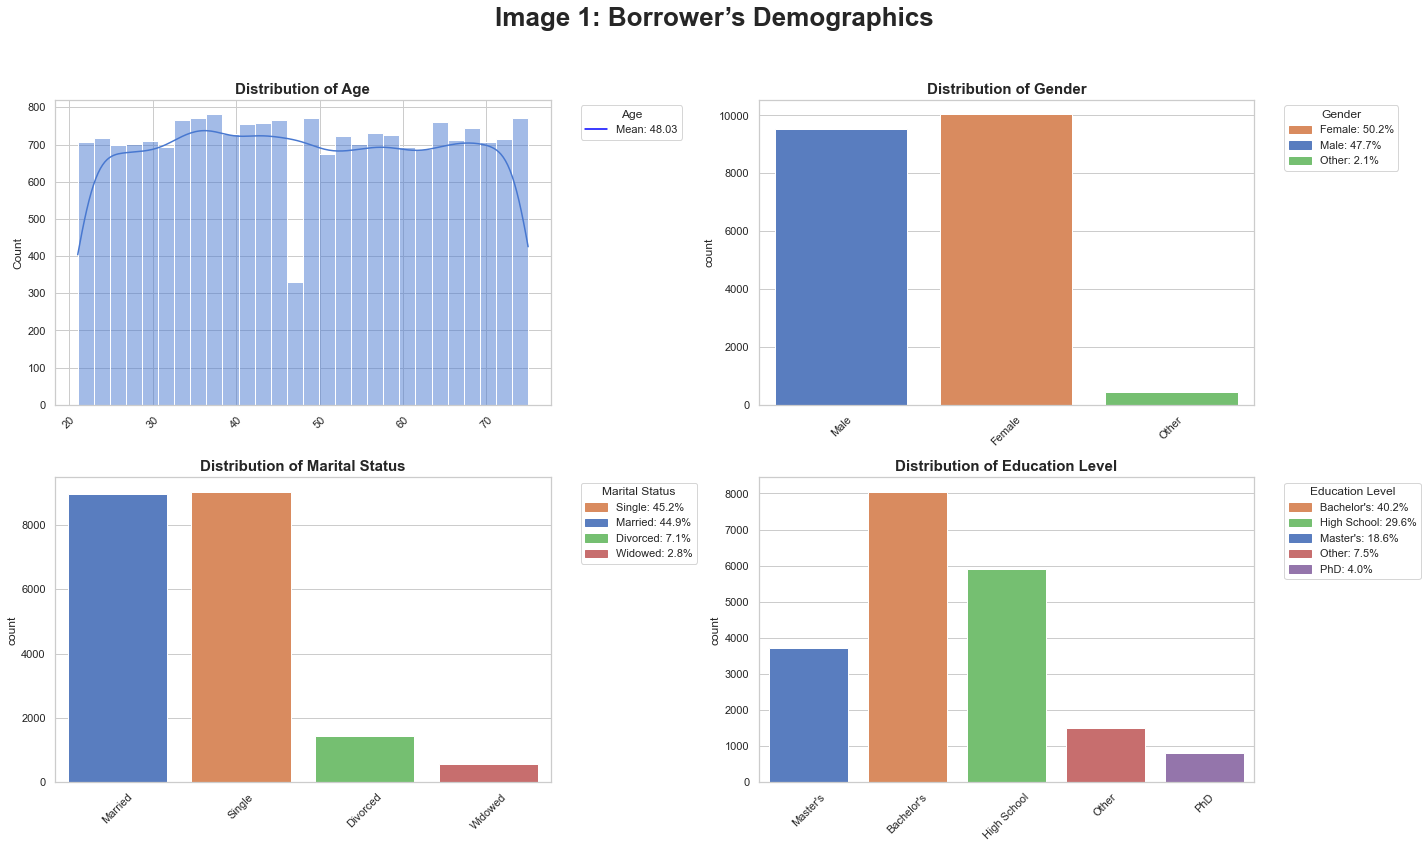

In [16]:
# Select the demographic variables to visualize
cols_to_plot = ['age', 'gender', 'marital_status', 'education_level']

# Determine the grid layout
n_cols = 2
# Dynamic calculation of rows needed based on the number of columns
# This ensures the grid adapts automatically if we add more variables to 'cols_to_plot'
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
# Flatten the 2D axes array into a 1D array for easier iteration
axes = axes.flatten()

# Loop through each axes and column simultaneously
for ax, col in zip(axes, cols_to_plot):

    # Conditional plotting based on data type
    # 1. Numerical Variables: Use Histogram with KDE (Kernel Density Estimate) to show distribution shape
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], kde=True, ax=ax)
        # Apply our custom helper function to visualize the mean
        add_mean_legend(ax, df, col)

    # 2. Categorical Variables: Use Countplot to show frequency
    else:
        sns.countplot(x=df[col], ax=ax)
        # Apply our custom helper function to show percentages in the legend
        add_percentage_legend(ax, df, col)

    # Chart formatting for readability
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    ax.tick_params(axis='x', rotation=45) # Rotate labels to prevent overlapping
    ax.set_xlabel("") # Remove x-label as the title is self-explanatory

# Hide any unused subplots (if the grid has empty spaces) to maintain a clean layout
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Set the Global Title for the entire figure
fig.suptitle('Image 1: Borrower’s Demographics', fontsize=26, fontweight='bold')

# Adjust layout to prevent the main title from overlapping with subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Conclusion**

The borrower demographic profile is remarkably balanced across key categories. The age distribution is nearly uniform with a mean of 48 years, and there is an almost even split between genders and marital status (Married vs. Single). Education levels are robust, with over 70% of applicants holding either a Bachelor's degree or a High School diploma, pointing toward an educated and mature applicant pool.

### 2. Financial Information

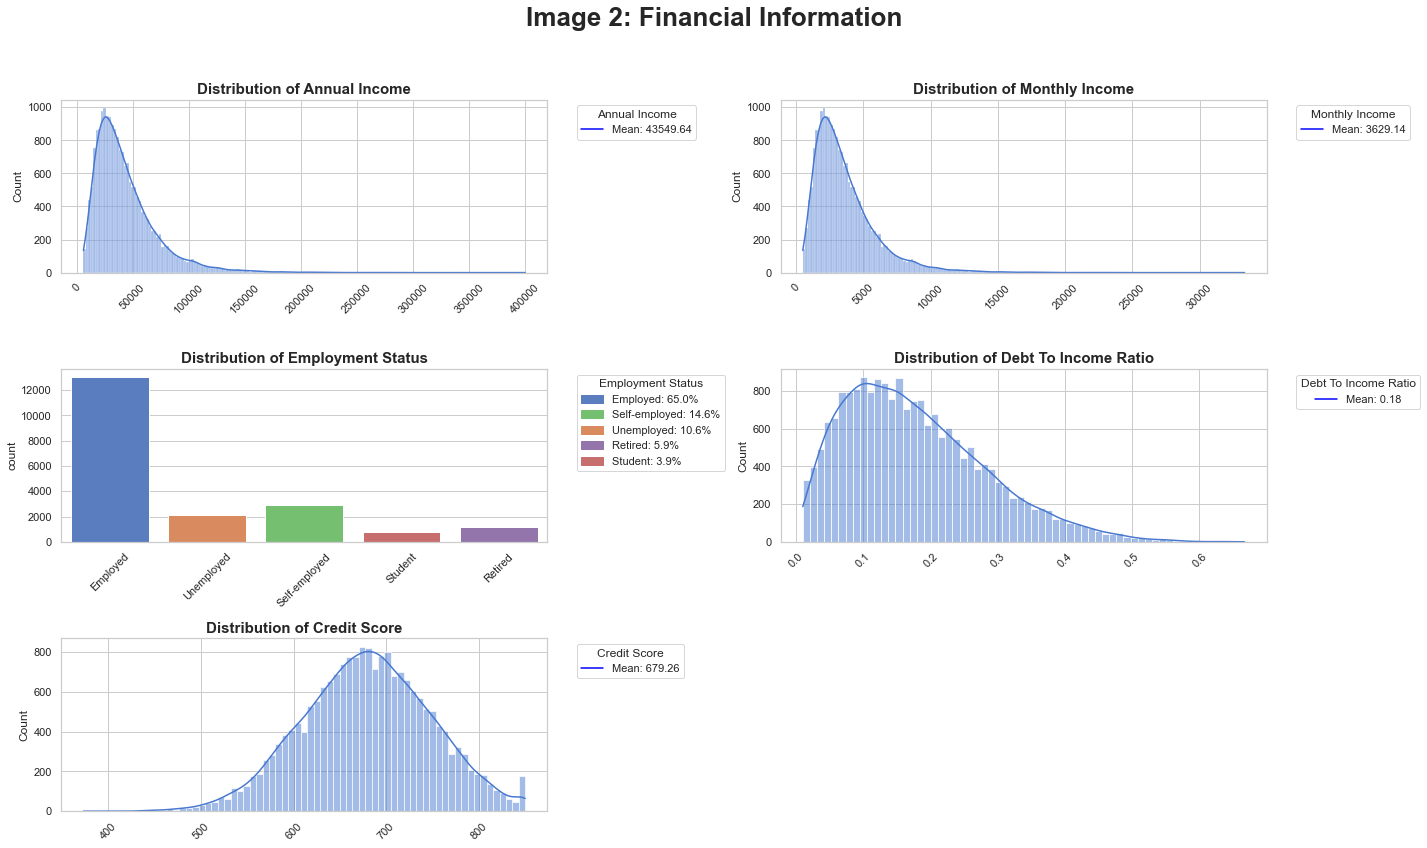

In [17]:
# Select the financial variables to visualize
cols_to_plot = ['annual_income', 'monthly_income', 'employment_status', 
                'debt_to_income_ratio', 'credit_score']

# Determine grid dimensions dynamically
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize the figure canvas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Iterate through each subplot and assigned column
for ax, col in zip(axes, cols_to_plot):

    # 1. Numerical Financial Data (e.g., Income, DTI, Credit Score)
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], kde=True, ax=ax)
        add_mean_legend(ax, df, col) # Visualizing the mean helps identify skewness

    # 2. Categorical Financial Data (e.g., Employment Status)
    else:
        sns.countplot(x=df[col], ax=ax)
        add_percentage_legend(ax, df, col)

    # Standard Formatting
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("")

# Hide empty subplots to keep the presentation professional
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Global Title
fig.suptitle('Image 2: Financial Information', fontsize=26, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Conclusion**

The analysis of borrower financial health indicates a predominantly employed customer base (65%) with a moderate debt-to-income ratio averaging 0.18. Income distributions are right-skewed, with a mean annual income of approximately $43,500. Notably, the credit score distribution is fairly normal with a mean of 679, suggesting that while income levels vary, the applicant pool generally maintains a respectable credit standing.

### 3. Loan Information

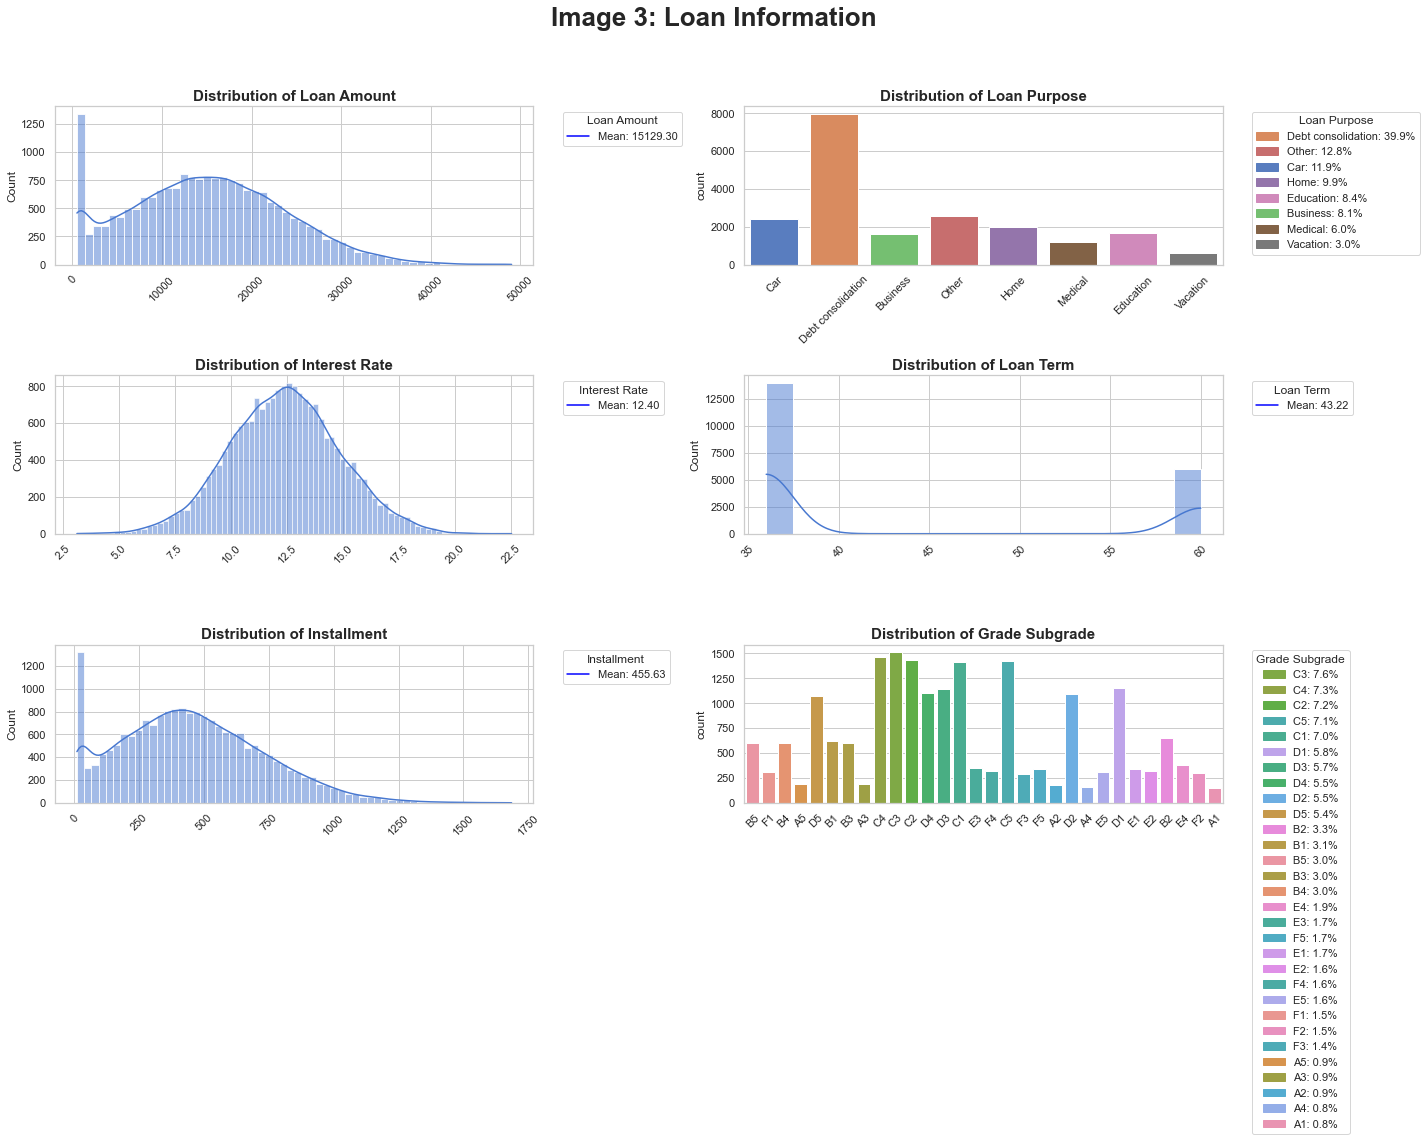

In [18]:
# Select the Loan-specific variables
cols_to_plot = ['loan_amount', 'loan_purpose', 'interest_rate', 
                'loan_term', 'installment', 'grade_subgrade']

# Dynamic Grid Calculation
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize Figure
# We increased the height to (15) because we have more rows/variables here
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

# Iterate through axes and features
for ax, col in zip(axes, cols_to_plot):

    # 1. Quantitative Loan Features (Amount, Rate, Installment)
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], kde=True, ax=ax)
        add_mean_legend(ax, df, col) # Helps identify the 'Average Loan' profile

    # 2. Qualitative Loan Features (Purpose, Grade)
    else:
        sns.countplot(x=df[col], ax=ax)
        add_percentage_legend(ax, df, col)

    # Standard Formatting
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    
    # Rotation is critical here, especially for 'loan_purpose' and 'grade_subgrade'
    ax.tick_params(axis='x', rotation=45) 
    ax.set_xlabel("")

# Clean up empty subplots
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Global Title
fig.suptitle('Image 3: Loan Information', fontsize=26, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Conclusion**

The portfolio is driven primarily by "Debt Consolidation" (approx. 40%), with an average loan amount of roughly $15,000. Structurally, the loans follow a bimodal term distribution (likely 36 and 60 months) and feature normally distributed interest rates averaging 12.4%. The concentration of loan sub-grades in the B and C tiers corroborates the interest rate findings, reflecting a risk-based pricing strategy targeting mid-tier borrowers.

### 4. Borrower’s Credit History

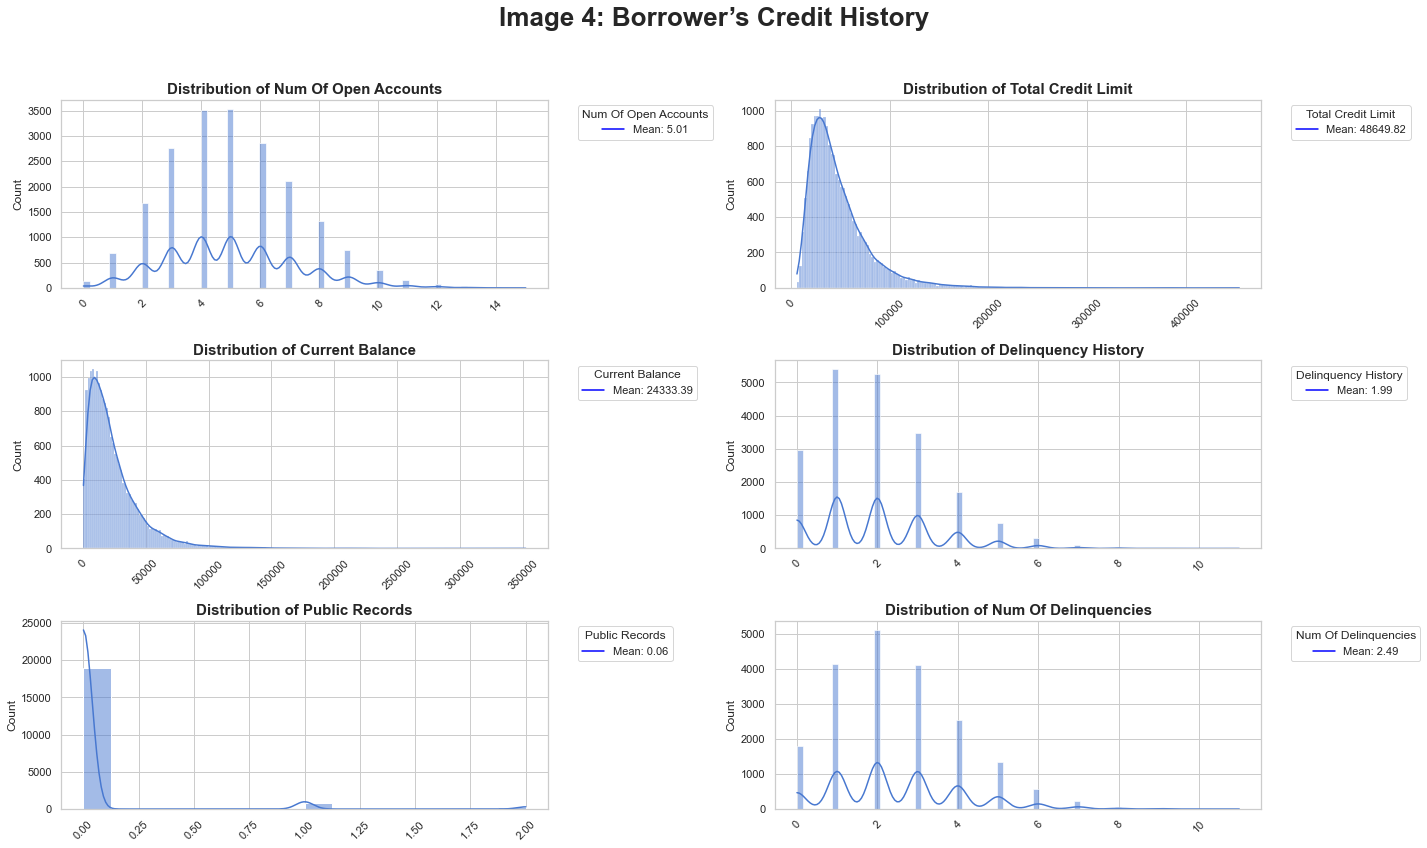

In [19]:
# Select Credit History variables
cols_to_plot = ['num_of_open_accounts', 'total_credit_limit', 'current_balance', 
                'delinquency_history', 'public_records', 'num_of_delinquencies']

# Dynamic Grid Calculation
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize Figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Iterate through axes and features
for ax, col in zip(axes, cols_to_plot):

    # 1. Quantitative History (e.g., Number of Open Accounts, Balance)
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], kde=True, ax=ax)
        add_mean_legend(ax, df, col)

    # 2. Categorical History (if any)
    else:
        sns.countplot(x=df[col], ax=ax)
        add_percentage_legend(ax, df, col)

    # Standard Formatting
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("")

# Clean up empty subplots
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Global Title
fig.suptitle('Image 4: Borrower’s Credit History', fontsize=26, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Conclusion**

This dataset highlights a divergence in credit utilization and history. While the average total credit limit (48,650) is significantly higher than the average current balance (24,333), the distributions are heavily skewed. The majority of applicants possess clean public records; however, the data reveals a subset of borrowers with delinquency history (averaging ~2 incidents), indicating that risk stratification based on past credit behavior is essential.

### 5. Target Variable

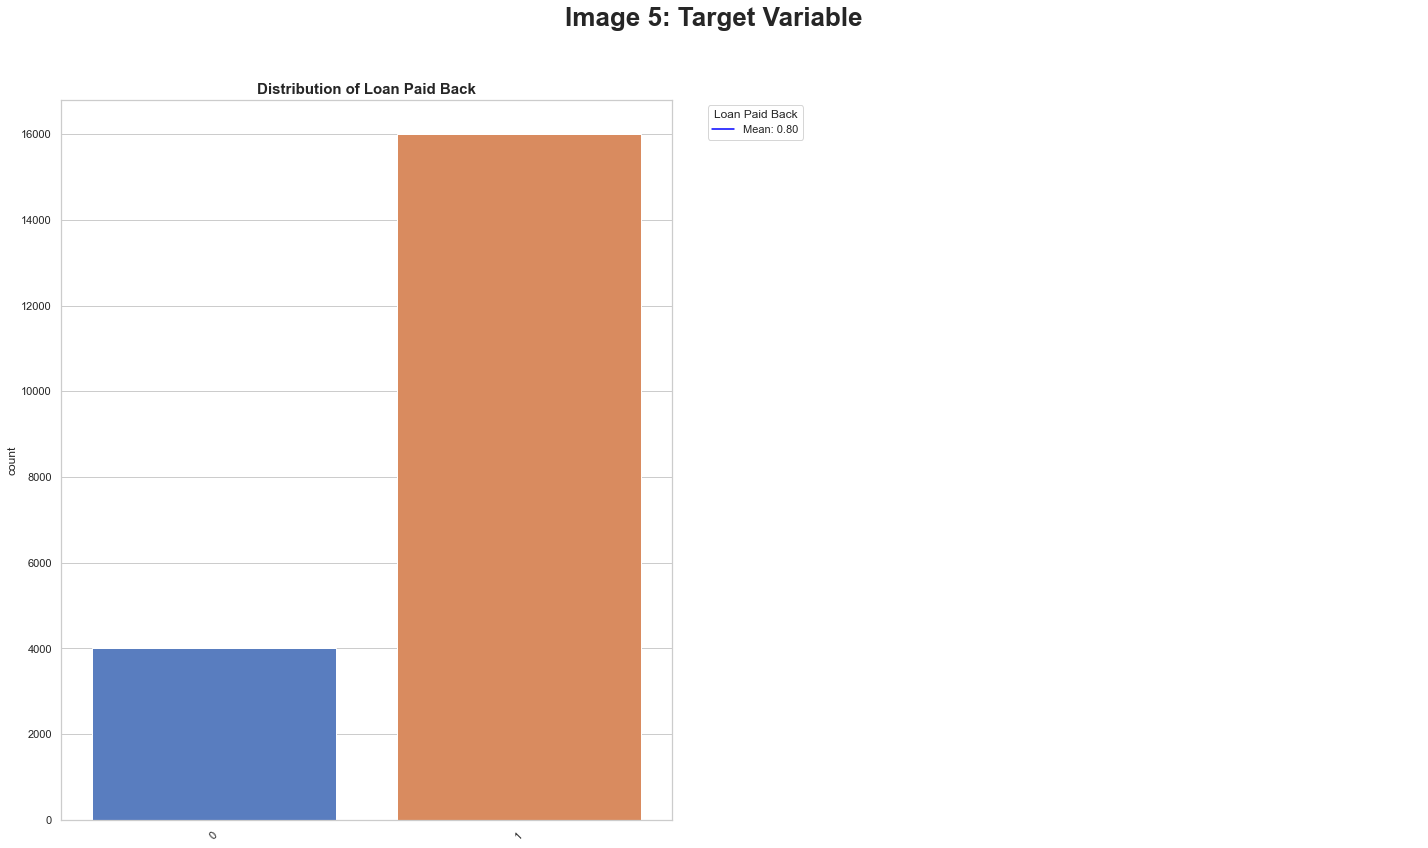

In [20]:
# Select the Target Variable
cols_to_plot = ['loan_paid_back']

# Dynamic Grid Calculation
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize Figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Iterate through axes (handling the single item list gracefully)
for ax, col in zip(axes, cols_to_plot):

    # 1. Check Data Type
    # Since 'loan_paid_back' is encoded as 0/1 (Numeric), this code will use .countplot() instead of .histplot()
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.countplot(x=df[col], ax=ax)
        add_mean_legend(ax, df, col)

    # 2. Categorical Target (e.g., 'Yes'/'No')
    else:
        sns.countplot(x=df[col], ax=ax)
        add_percentage_legend(ax, df, col)

    # Standard Formatting
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("")

# Hide empty subplots (The second slot in the grid will be hidden)
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Global Title
fig.suptitle('Image 5: Target Variable', fontsize=26, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Conclusion**

The distribution of the "Loan Paid Back" variable reveals a significant class imbalance typical of credit risk datasets. Approximately 80% of loans are successfully repaid, while 20% result in default. This imbalance suggests that any predictive modeling undertaken on this data will require specific techniques (such as resampling or class weighting) to accurately detect the minority class of defaulters.

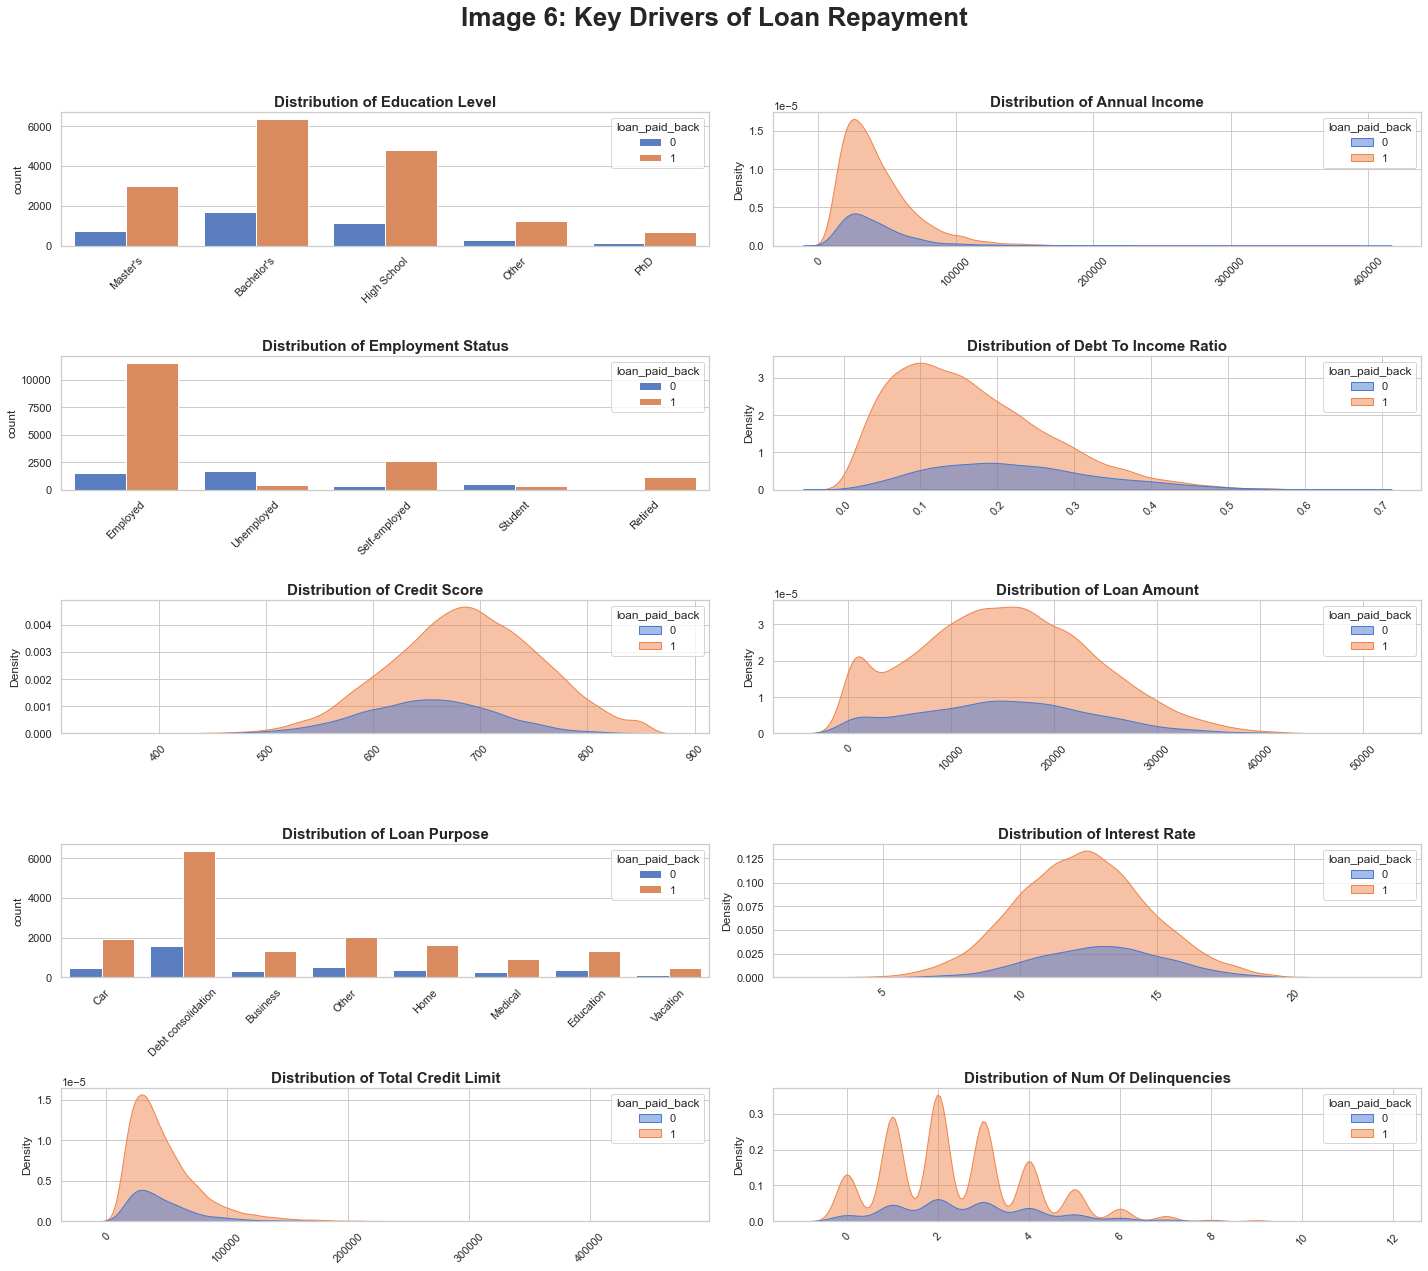

In [21]:
# Selection of high-impact variables (Handpicked features)
# These features were selected based on domain knowledge as potential predictors of default.
cols_to_plot = ['education_level', 'annual_income', 
                'employment_status', 'debt_to_income_ratio', 
                'credit_score', 'loan_amount',
                'loan_purpose', 'interest_rate', 'total_credit_limit',
                'num_of_delinquencies']

# Dynamic Grid Calculation
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Initialize Figure
# Increased height (18) to accommodate the dense information in bivariate plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 18))
axes = axes.flatten()

# Iterate through axes and features
for ax, col in zip(axes, cols_to_plot):

    # 1. Bivariate Analysis for Numeric Variables
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.kdeplot(data=df, x=col, hue='loan_paid_back', fill=True, alpha=0.5, ax=ax)
        # Note: Legends are often omitted in loops to prevent clutter, 
        # as the 'hue' provides the necessary context (Blue vs Orange).

    # 2. Bivariate Analysis for Categorical Variables
    # We use a Countplot with 'hue'.
    else:
        sns.countplot(data=df, x=col, hue='loan_paid_back', ax=ax)

    # Standard Formatting
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=15, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("")

# Hide empty subplots
for ax in axes[len(cols_to_plot):]:
    ax.axis('off')

# Global Title
fig.suptitle('Image 6: Key Drivers of Loan Repayment', fontsize=26, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Key Insights**

Based on the distribution analysis of the dataset, the following key insights have been identified regarding loan repayment performance:

* **Primary Predictors of Repayment:** **Credit Score** and **Interest Rate** act as the strongest differentiators. A clear correlation exists where higher credit scores (>700) and lower interest rates (<10%) significantly align with successful loan repayment.
* **Demographic Volume vs. Risk:** While the majority of borrowers are **Employed** and hold **Bachelor's degrees**, these segments also contain the highest volume of non-repayment. This suggests that employment status and education level are prerequisites for borrowing but are not strong standalone indicators of repayment reliability.
* **Income Stability:** There is a discernible link between higher **Annual Income** and repayment, whereas lower income brackets ($30k-$40k) show a distinct spike in default density.
* **Loan Purpose Risk:** **Debt Consolidation** is the dominant driver of loan volume but is disproportionately associated with non-repayment. Conversely, purposes such as "Business" or "Home" show slightly more favorable repayment ratios.
* **Non-Discriminatory Factors:** **Loan Amount** appears to be a neutral factor; the risk of default remains consistent regardless of whether the loan size is small or large.

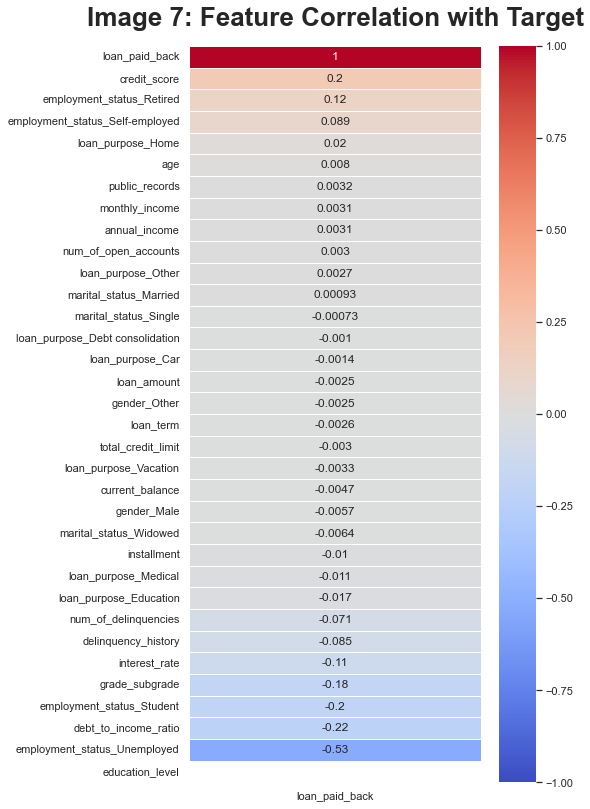

In [23]:
# Initialize the figure
plt.figure(figsize=(8, 12)) 

# 1. Encoded df
df_encoded = df.copy()

# a. Manual Mapping (Ordinal) - Adjust keys if they differ in your data
df_encoded['education_level'] = df_encoded['education_level'].map({'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4, 'Other': 0})

# b. Automatic Alphabetical Encoding (Ordinal) - Equivalent to LabelEncoder
df_encoded['grade_subgrade'] = df_encoded['grade_subgrade'].astype('category').cat.codes

# c. One-Hot Encoding (Nominal) - Converts the rest of categorical cols to dummies
df_encoded = pd.get_dummies(df_encoded, columns=['gender', 'marital_status', 'employment_status', 'loan_purpose'], drop_first=True, dtype=int)

# 2. Calculate Correlation against the Target
# We filter specifically for 'loan_paid_back' to isolate the predictive power of each feature.
# We sort descending so the strongest positive predictors are at the top and negative at the bottom.
target_corr = df_encoded.corr()[['loan_paid_back']].sort_values(by='loan_paid_back', ascending=False)

# 3. Plot the Heatmap
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# 4. Titles and Layout
plt.title('Image 7: Feature Correlation with Target', fontsize=26, fontweight='bold', pad=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 📈 Conclusion

This correlation heatmap effectively summarizes the linear relationship between all engineered features and the target variable, `loan_paid_back` (1 = Paid Back, 0 = Default).

### Strongest Indicators (High Absolute Correlation):

1.  **Employment Status (Negative Correlation):** **`employment_status_Unemployed`** shows the strongest negative correlation at **-0.53**. This indicates that unemployment is the single most powerful predictor of *non-repayment* (default). This category should be heavily weighted as a primary risk factor in the final model.
2.  **Credit Score (Positive Correlation):** **`credit_score`** holds the highest positive correlation at **0.2**. This confirms that, among the continuous variables, better credit history is the most significant indicator of successful repayment.

### Key Risk Factors (Negative Correlation):

* **Debt & Risk (Negative):** The **`debt_to_income_ratio` (-0.22)** and **`interest_rate` (-0.11)** show moderate negative correlations, confirming that higher debt burden and risk-based pricing lead to a lower probability of repayment.
* **Delinquency History:** Both **`delinquency_history` (-0.085)** and **`num_of_delinquencies` (-0.071)** are negatively correlated, showing that a poor payment history, while not the strongest predictor, does increase default risk.
* **Employment Status (Specific Risk):** **`employment_status_Student` (-0.2)** represents a specific high-risk category, second only to unemployment.

### Weak Predictors (Near Zero Correlation):

* **Loan Characteristics & Demographics:** Variables such as `loan_amount`, `loan_term`, `annual_income`, and most of the loan purpose dummy variables (e.g., `loan_purpose_Car`, `loan_purpose_Home`) show correlations very close to zero (e.g., between -0.005 and 0.015). This suggests that their linear relationship with repayment is negligible and they are less critical for a simple linear model.

---

## EDA Summary

This analysis characterizes the borrower profile and identifies the fundamental drivers of financial risk within the loan portfolio. The insights below are intended to guide strategic lending decisions and risk policy adjustments.

### 1. Portfolio Overview & Health
* **Default Rate:** The portfolio exhibits a **20% default rate** (Class 0). While the majority (80%) repay successfully, a one-in-five failure rate represents significant capital exposure that requires targeted mitigation.
* **Borrower Profile:** The "typical" borrower is approximately 48 years old, employed, and holds a Bachelor's or High School degree.
* **Dominant Motivation:** The primary driver for borrowing is **Debt Consolidation** (~40% of all loans). This indicates that a large segment of the customer base is already managing existing financial stress before taking out this loan.

### 2. Critical Risk Drivers (The "Why" behind Defaults)
Based on the bivariate and correlation analysis, the following factors are the primary indicators of non-payment:

* **Employment is the Key Determinant:**
    * **Insight:** There is a drastic divergence in repayment based on employment status. **Unemployment** shows a massive correlation with default (-0.53).
    * **Business Implication:** Loans issued to individuals without stable employment (or students) act as the primary leak in the portfolio. Current income verification processes for these groups may be insufficient.

* **The "Debt Trap" (DTI & Loan Purpose):**
    * **Insight:** Borrowers with high **Debt-to-Income (DTI)** ratios (>0.30) are disproportionately represented in the default group. Furthermore, **Debt Consolidation** loans, despite being the most common product, carry a higher frequency of default compared to "value-add" loans like Business or Home improvement.
    * **Business Implication:** High DTI combined with a request for debt consolidation signals a borrower potentially entering a cycle of insolvency rather than liquidity management.

* **Credit Score Sensitivity:**
    * **Insight:** The repayment distribution shifts significantly around the **680-700 FICO score** mark. Borrowers below this threshold show a rapidly increasing probability of default.
    * **Business Implication:** The current risk scoring model is effective; however, the volume of loans approved below this threshold suggests a high appetite for risk that may not be yielding proportional returns.

# 4. Risk & Borrower Behavior Insights

### 📊 Risk Characteristic Analysis

#### 1. Unstable Employment (Confirmed: Critical Risk Factor)
* **Evidence:** This is the strongest predictor in your dataset.
* **Visual (Image 6):** In the "Distribution of Employment Status," the bar for **Unemployed** shows a disproportionately high volume of non-payments (blue/0) compared to payments.
* **Statistical (Image 7):** The correlation between `employment_status_Unemployed` and `loan_paid_back` is **-0.53**. This is a massive negative correlation, mathematically confirming that lacking a job is the primary driver of default.

#### 2. High Debt-to-Income (DTI) Ratio (Confirmed: High Risk)
* **Evidence:** A strong association exists.
* **Visual (Image 6):** The density plot for `Debt To Income Ratio` shows a clear separation. The orange curve (Paid Back) peaks earlier (lower DTI), while the blue curve (Default) is shifted to the right, indicating that defaulters typically carry a heavier debt burden relative to their income.
* **Statistical (Image 7):** The correlation is **-0.22**, confirming that as DTI increases, the likelihood of repayment decreases significantly.

#### 3. Low Credit Score (Confirmed: High Risk)
* **Evidence:** Validated as a primary risk indicator.
* **Visual (Image 6):** The `Credit Score` distribution shows the blue curve (Default) is shifted to the left (lower scores) compared to the orange curve. There is a "danger zone" below 650 where defaults spike.
* **Statistical (Image 7):** The correlation is **+0.20**. A positive correlation here means higher scores = higher repayment (and conversely, lower scores = higher default).

---

### 📝 Summary

**"The Profile of a High-Risk Borrower"**
Based on the EDA, the characteristics most strongly associated with default are **structural** rather than behavioral regarding account balances.

* **Primary Flags:** Unemployment (Correlation -0.53) and High DTI (-0.22).
* **Secondary Flags:** Low Credit Score (+0.20) and High Interest Rates (-0.11).
* **False Flags:** Current account balance and Loan Amount are **not** predictive of default risk in this portfolio.

# 5. Baseline Predictive Modeling

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# 1. Feature Engineering & Preprocessing 
# Create a copy to ensure the original dataframe remains intact for other analyses
df_model = df.copy()

# A. Feature Selection
# Note: While EDA showed low linear correlation for 'current_balance' and 'loan_amount',
# we retain them because Random Forest can capture non-linear interactions between features.

# B. Encoding Categorical Variables
# Define the columns to be transformed into dummy variables
categorical_cols = ['gender', 'marital_status', 'education_level', 
                    'employment_status', 'loan_purpose', 'grade_subgrade']

# Apply One-Hot Encoding (get_dummies)
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# 2. Data Preparation (Split)
# Separate Features (X) and Target (y)
X = df_model.drop('loan_paid_back', axis=1)
y = df_model['loan_paid_back']

# Train-Test Split
# We use 'stratify=y' because our EDA revealed a class imbalance (approx. 80% Paid / 20% Default).
# Stratification ensures that both Train and Test sets maintain this specific ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Model Training 
# Initialize RandomForestClassifier
# We set class_weight='balanced' to penalize errors on the minority class (Defaults) more heavily.
# This prevents the model from simply predicting "Paid" for everyone to achieve high accuracy.
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Generate Predictions
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:, 1] # Probability estimates required for ROC-AUC score

# 4. Performance Evaluation 
print("--- Model Performance Metrics (Classification) ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Quick Interpretation of the Confusion Matrix structure:
# [[TN, FP],
#  [FN, TP]]
# TN (True Negative): Predicted Default, and it WAS Default (Successful Detection)
# FN (False Negative): Predicted Paid, but it WAS Default (The most costly error for a bank)

--- Model Performance Metrics (Classification) ---
Accuracy:  0.8988
ROC-AUC:   0.8757

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.95      0.52      0.67       800
           1       0.89      0.99      0.94      3200

    accuracy                           0.90      4000
   macro avg       0.92      0.76      0.81      4000
weighted avg       0.90      0.90      0.89      4000


--- Confusion Matrix ---
[[ 416  384]
 [  21 3179]]


### 📊 Model Evaluation Executive Summary

**Overall Performance:**
The model demonstrates strong predictive power with an **Accuracy of ~90%** and an **ROC-AUC of 0.88**, indicating it is highly effective at distinguishing between reliable borrowers and potential defaulters.

**Key Strengths (High Precision & Customer Experience):**
* **High Trust in Risk Flags (Precision Class 0: 95%):** When the model predicts a loan will default, it is correct **95% of the time**. This makes the model an extremely reliable tool for rejecting bad applications without accidentally rejecting good customers.
* **Excellent Retention of Good Borrowers (Recall Class 1: 99%):** The model correctly identified nearly all good payers (3179 out of 3200). It only misclassified **21 good customers** as high-risk. This minimizes "customer friction" and ensures the bank does not lose revenue from legitimate applicants.

**Critical Weakness (Risk Leakage):**
* **Missed Defaults (Recall Class 0: 52%):** The model is **conservative**. It only captured **52% of the actual default cases** (416 out of 800).
* **Financial Impact:** Crucially, the Confusion Matrix shows that **384 borrowers who eventually defaulted were predicted as "Good Payers"**.
    * In a banking context, this is the most expensive type of error (False Negative for Risk), as the bank would lend money to these 384 people and likely lose the principal.

### Verdict & Recommendation

**Verdict:**
The current model is highly efficient at **automating approvals** (it almost never rejects a good customer), but it is **too lenient on risk**. It minimizes "opportunity cost" (lost business) but does not sufficiently minimize "credit loss."


# 6. Recommendations & Conclusions

### Data-Driven Risk Assessment
This analysis successfully characterized the borrower profile and developed a predictive model to identify default risk. While the Random Forest model achieved a high overall **Accuracy (~90%)**, the analysis of the Confusion Matrix reveals a "conservative" bias: the model is excellent at identifying good payers (Precision Class 1: 89%) but misses a significant portion of actual defaulters (Recall Class 0: 52%).

To optimize profitability and minimize credit loss, the following strategies are recommended based on the data:

### 1. Strategic Policy Adjustments (High-Impact Variables)
The analysis identified three dominant factors driving default. Loan approval policies should be updated to address these specifically:

* **Employment Status (The "Knockout" Rule):**
    * *Observation:* Unemployment is the single strongest predictor of default (Correlation: -0.53).
    * *Recommendation:* Implement a **"Hard Knockout" rule**. Applicants listed as "Unemployed" should be automatically rejected or routed to a manual underwriter for collateral review, regardless of their credit score. The model alone is not needed to make this decision; the raw data justifies a strict policy.
* **Credit Score "Danger Zone" (< 680):**
    * *Observation:* The default rate spikes significantly for borrowers with FICO scores below 680.
    * *Recommendation:* Tighten approval criteria for this segment. For applicants in the 600-680 range, require a lower **Debt-To-Income (DTI)** ratio (e.g., max 20%) to compensate for the lower credit reliability.
* **Debt Consolidation Scrutiny:**
    * *Observation:* "Debt Consolidation" is the most common loan purpose but carries a disproportionate risk when combined with high DTI.
    * *Recommendation:* Treat high-DTI debt consolidation requests as "distress signals" rather than standard loans. Require direct payment to creditors (paying off the credit cards directly) rather than depositing cash into the borrower's account to ensure funds are used for liability reduction.

### 2. Model Implementation Strategy: Fixing the "Leak"
The current model misses 48% of defaults (False Negatives), which represents a significant financial risk. To fix this without retraining:

* **Calibrate the Decision Threshold:**
    * Currently, the model classifies a loan as "Default" only if the probability is > 50%.
    * **Action:** Lower the discrimination threshold to **30% or 35%**.
    * *Impact:* This will flag more loans as "Potential Default." While this will increase False Positives (rejecting some good customers), it is a necessary trade-off to capture the **384 defaulters** that the current model missed. In risk management, avoiding a bad loan is often more valuable than approving a marginal good one.

### 3. Borrower Profiling & Segmentation
Two distinct profiles emerged from the analysis:
* **The "Prime" Borrower:** Employed, Credit Score > 700, DTI < 20%. *Strategy:* Auto-approval with competitive interest rates to maximize acquisition.
* **The "Subprime" Risk:** Unemployed or Student, Credit Score < 650, Requesting Debt Consolidation. *Strategy:* Auto-rejection or requirement of a co-signer.

### Final Conclusion
The project confirms that **employment stability** and **credit history** are far superior predictors of repayment than the loan amount or current account balance. By implementing a hybrid approach—using **hard rules** for employment status and a **calibrated machine learning model** for the remaining applicants—the bank can significantly reduce its default exposure while maintaining a healthy volume of loan originations.